In [293]:
import pandas as pd
import seaborn as sns
import numpy as np
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt

In [294]:
df = pd.read_csv('food_outbreaks/NationalOutbreak_OutbreakData.csv')

In [295]:
df.head()

,Year,Month,State,Primary Mode,Etiology,Serotype or Genotype,Etiology Status,Setting,Illnesses,Hospitalizations,Info on Hospitalizations,Deaths,Info on Deaths,Food Vehicle,Food Contaminated Ingredient,IFSAC Category,Water Exposure,Water Type,Animal Type,Animal Type Specify,Water Status
0,2009,1,Minnesota,Person-to-person,Norovirus Genogroup II,unknown,Confirmed,Hotel/motel,21,0.0,19.0,0.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2009,1,Minnesota,Food,Norovirus,NaN,Suspected,Restaurant - Sit-down dining,2,0.0,2.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2009,2,Minnesota,Person-to-person,Norovirus,NaN,Suspected,"Other, specify",50,0.0,0.0,0.0,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2009,1,Minnesota,Person-to-person,Norovirus unknown,NaN,Confirmed,Restaurant,24,0.0,24.0,0.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2009,1,Minnesota,Food,Norovirus,NaN,Confirmed,NaN,16,0.0,8.0,0.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

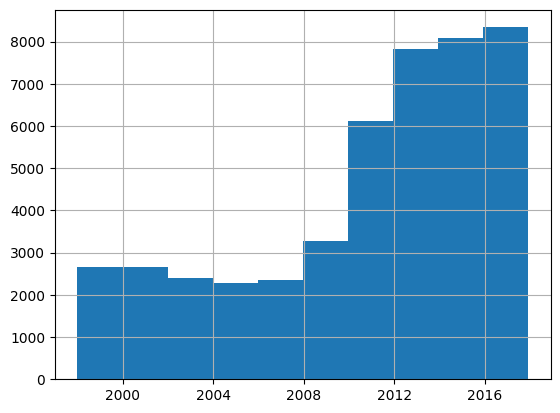

# Part A: EDA

Notes from outside sources/instructions

References: https://www.cdc.gov/nors/data/dashboard/faq-using-dashboard.html

http://wwwn.cdc.gov/foodborneoutbreaks/

Example question: Predict the number of ill people or the Etiology.

Enteric diseases are caused by micro-organisms such as viruses, bacteria and parasites that cause intestinal illness

When a user searches NORS Dashboard for outbreaks in a particular state, NORS Dashboard shows all single state outbreaks and multistate outbreaks in which that state was involved. The number of illnesses listed for each multistate outbreak represents the total number in all states involved in the outbreak. Similarly, the number of hospitalizations and deaths includes those for all states with cases in the multistate outbreak.

A food vehicle is the contaminated food item a person ate before becoming sick. It may contain more than one ingredient. When searching for a food, both of these fields will be included in the search.

If a contaminated ingredient is listed in NORS Dashboard, it is more specific than the food vehicle and is the specific food or ingredient in the food vehicle that was implicated. For example, in August 2010, Michigan reported an outbreak of 41 illnesses caused by Salmonella serotype Javiana. Potato salad was the food vehicle; yellow onion was the contaminated ingredient.

If a contaminated ingredient is not listed in NORS Dashboard, the food vehicle category provides the best information available.

In [ ]:
## print head
## describe/info for each column

In [296]:
print('Foodborn Illnesses')
print('|'*20)
num_obs = df.shape[0]
num_features = df.shape[1]
feature_names = df.columns
print(df.head())
print('\n'*3)
print(f'NUM OBS: {num_obs}')
print(f'NUM FEAT: {num_features}')
print(f'FEATURE NAMES: {feature_names}')
print('\n')
print(df.describe())
print('\n')
print(df.info())

Foodborn Illnesses
||||||||||||||||||||
   Year  Month      State      Primary Mode                Etiology  \
0  2009      1  Minnesota  Person-to-person  Norovirus Genogroup II   
1  2009      1  Minnesota              Food               Norovirus   
2  2009      2  Minnesota  Person-to-person               Norovirus   
3  2009      1  Minnesota  Person-to-person       Norovirus unknown   
4  2009      1  Minnesota              Food               Norovirus   

  Serotype or Genotype Etiology Status                       Setting  \
0              unknown       Confirmed                   Hotel/motel   
1                  NaN       Suspected  Restaurant - Sit-down dining   
2                  NaN       Suspected                Other, specify   
3                  NaN       Confirmed                    Restaurant   
4                  NaN       Confirmed                           NaN   

   Illnesses  Hospitalizations  Info on Hospitalizations  Deaths  \
0         21               0.0  

## Notes from above:
- the only information we have for all observations is year, month, state, primary mode, and illnessess
- info on deaths / hospitalizations should match the number of illnesses if the information is complete

In [297]:
df.head()

,Year,Month,State,Primary Mode,Etiology,Serotype or Genotype,Etiology Status,Setting,Illnesses,Hospitalizations,Info on Hospitalizations,Deaths,Info on Deaths,Food Vehicle,Food Contaminated Ingredient,IFSAC Category,Water Exposure,Water Type,Animal Type,Animal Type Specify,Water Status
0,2009,1,Minnesota,Person-to-person,Norovirus Genogroup II,unknown,Confirmed,Hotel/motel,21,0.0,19.0,0.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2009,1,Minnesota,Food,Norovirus,NaN,Suspected,Restaurant - Sit-down dining,2,0.0,2.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2009,2,Minnesota,Person-to-person,Norovirus,NaN,Suspected,"Other, specify",50,0.0,0.0,0.0,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2009,1,Minnesota,Person-to-person,Norovirus unknown,NaN,Confirmed,Restaurant,24,0.0,24.0,0.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2009,1,Minnesota,Food,Norovirus,NaN,Confirmed,NaN,16,0.0,8.0,0.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## When I first looked at the value counts for the categorical data, I noticed some were in the form of a list delimited by "; ".  For example, "Animal Type" could be "Cattle" or "Pig; Cattle" ... meaning that "Cattle" was an animal for both observations.  Here, as I look a the value counts, I find the unique categories in each list

array([[<Axes: title={'center': 'DATE'}>]], dtype=object)

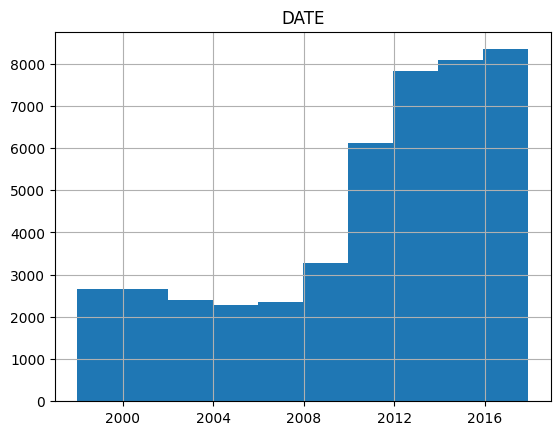

In [167]:
df.hist("DATE")

In [298]:
## Look at value counts, % non-null, and data types
col_dict = {}
for col in df.columns:
  col_dict[col] = {}
  if df[col].dtype == 'O':
    print('|'*40)
    print(col)
    print(df[col].value_counts())
    print('\n'*4)
    print(df[col].info())
    values = list(df[col].value_counts().index)
    value_counts = list(df[col].value_counts())
    col_dict[col]['Type'] = '0'
    col_dict[col]['original_values_and_counts'] = df[col].value_counts()
  else:
    print('|'*40)
    print(col)  
    col_dict[col]['Type'] = df[col].dtype
    print(df[col].info())
    print(df[col].describe())
  percent_non_null = df[~df[col].isna()].shape[0]/df.shape[0]*100
  col_dict[col]['% non-nulll'] = percent_non_null
  print(f'% non-null: {percent_non_null:.2f}')
  print('\n'*4)



||||||||||||||||||||||||||||||||||||||||
Year
<class 'pandas.core.series.Series'>
RangeIndex: 46024 entries, 0 to 46023
Series name: Year
Non-Null Count  Dtype
--------------  -----
46024 non-null  int64
dtypes: int64(1)
memory usage: 359.7 KB
None
count    46024.000000
mean      2010.304080
std          5.532413
min       1998.000000
25%       2007.000000
50%       2012.000000
75%       2015.000000
max       2017.000000
Name: Year, dtype: float64
% non-null: 100.00





||||||||||||||||||||||||||||||||||||||||
Month
<class 'pandas.core.series.Series'>
RangeIndex: 46024 entries, 0 to 46023
Series name: Month
Non-Null Count  Dtype
--------------  -----
46024 non-null  int64
dtypes: int64(1)
memory usage: 359.7 KB
None
count    46024.000000
mean         5.771684
std          3.781465
min          1.000000
25%          2.000000
50%          5.000000
75%          9.000000
max         12.000000
Name: Month, dtype: float64
% non-null: 100.00





||||||||||||||||||||||||||||||||||||||||
Stat

### Some categories, such as "Animal Type" have one entry (ex: "Cattle") but often have multiple values listed in one observation, delimited by "; " (ex: "Cattle; Pig; Poultry").  Here, I get a count of each time a value appears, even if it is in a list

In [299]:
unique_value_counts_dict = {x: {} for x in df.columns if df[x].dtype == 'O'}
unique_value_counts_dict

{'State': {},
 'Primary Mode': {},
 'Etiology': {},
 'Serotype or Genotype': {},
 'Etiology Status': {},
 'Setting': {},
 'Food Vehicle': {},
 'Food Contaminated Ingredient': {},
 'IFSAC Category': {},
 'Water Exposure': {},
 'Water Type': {},
 'Animal Type': {},
 'Animal Type Specify': {},
 'Water Status': {}}

In [300]:
for i, row in df.iterrows():
    for col in unique_value_counts_dict.keys():
        if type(row[col]) == str:
            list_values= row[col].split("; ")
            for value in list_values:
                if value in unique_value_counts_dict[col].keys():
                    unique_value_counts_dict[col][value] += 1
                else:
                    unique_value_counts_dict[col][value] = 1
    

In [301]:
## Check that the above worked
sorted(unique_value_counts_dict['Animal Type'].items(), key=lambda x:x[1])[::-1]

[('Cattle', 111),
 ('Baby chick or duckling', 59),
 ('Sheep or goats', 56),
 ('Other poultry', 53),
 ('Other (specify)', 35),
 ('Turtle', 30),
 ('Other small mammalian household pet', 27),
 ('Dog or Puppy', 20),
 ('Pig', 16),
 ('Other reptile', 8),
 ('Lizard', 8),
 ('Cat or kitten', 4),
 ('Pet fish', 4),
 ('Amphibian', 3),
 ('Bird, not including poultry', 3)]

### Count of unique values for each category (top 10 for each)

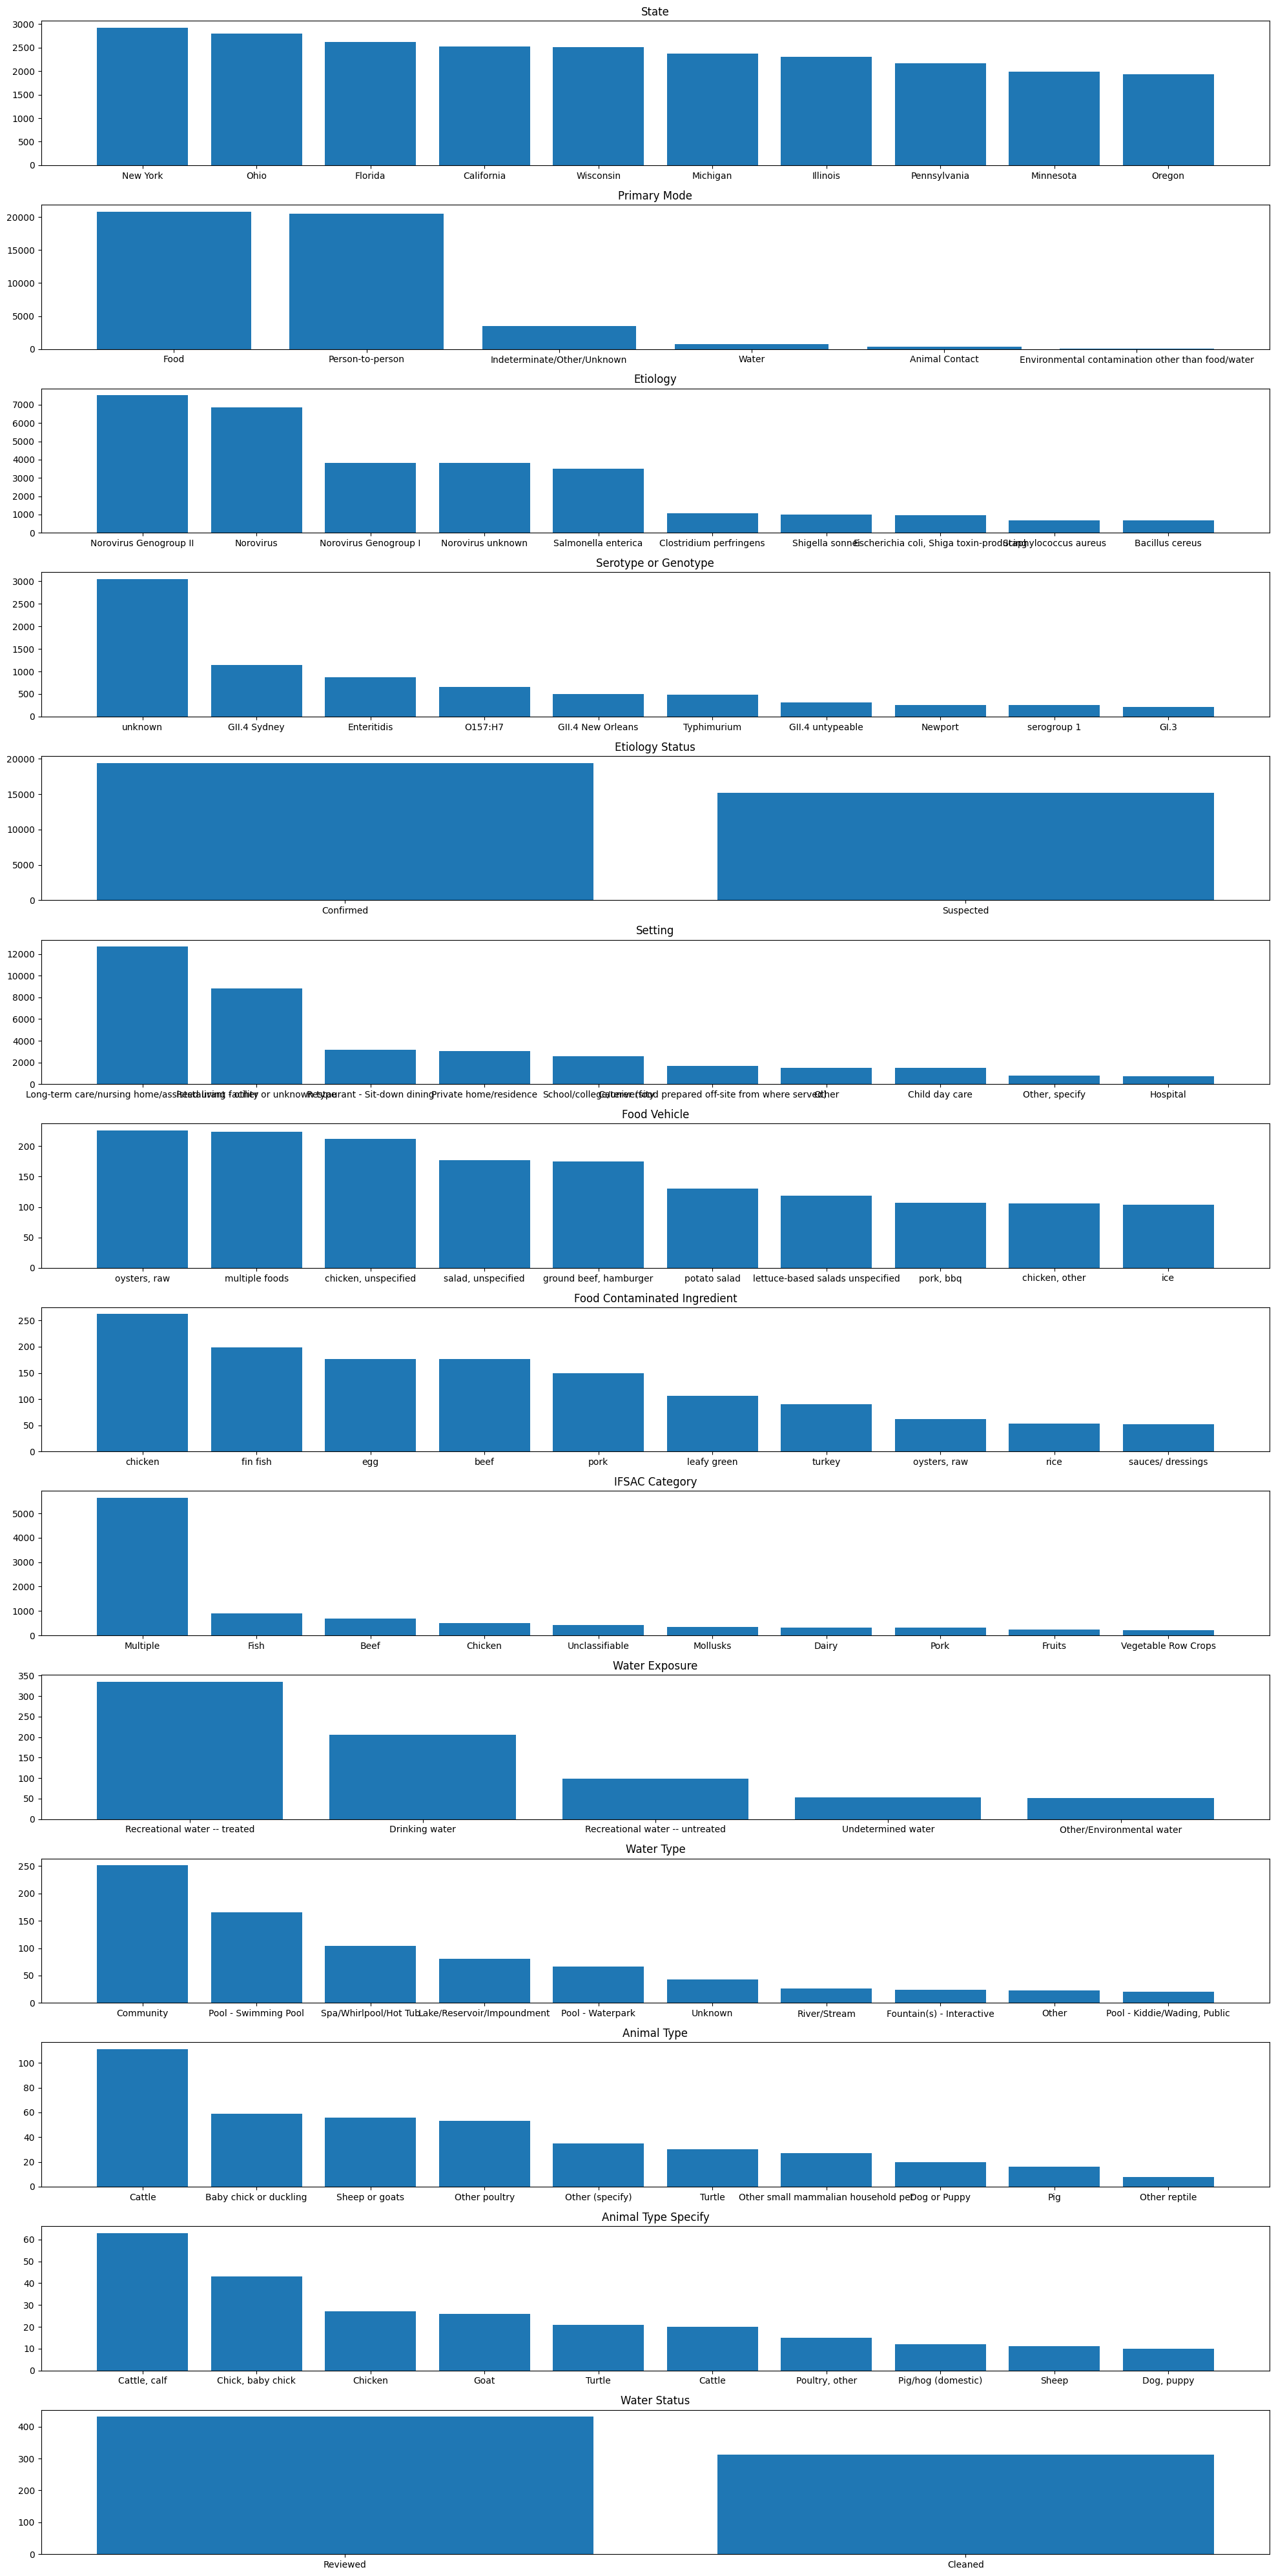

In [302]:
fig, ax = plt.subplots(len(unique_value_counts_dict.keys()), 1, figsize=(20,40))
for a,key in zip(ax,unique_value_counts_dict.keys() ):
    top_items = sorted(unique_value_counts_dict[key].items(), key=lambda x:x[1])[::-1][:10]
    x = [x[0] for x in top_items]
    y = [x[1] for x in top_items]
    a.bar(x,y)
    a.title.set_text(key)
plt.tight_layout()
plt.show()

In [303]:
## one hot encode columns for each unique value in each category.  The purpose is so that we can break out the lists into variables representing each item in the list.  
# This is not necessary for some categorical columns, such as state or Primary mode, which do not have multiple entries in any observations.

for col in [x for x in df.columns if df[x].dtype == 'O']:
    if col == 'State' or col == 'Primary Mode':
        continue
    else:
        top_items = sorted(unique_value_counts_dict[col].items(), key=lambda x:x[1])[::-1][:10]
        new_col = [col + "_" + x[0] for x in top_items]
        df[new_col] = False
        for i, row in df.iterrows():
            values = row[col]
            if type(values) == str:
                values = values.split("; ")
                for value in values:
                    if value in [x[0] for x in top_items]:         
                        df.at[i, col + "_" + value] = True
        

/var/folders/v3/c0d4s4wx2pb2cx1vghk_l1tr0000gn/T/ipykernel_85346/1577146652.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = False
/var/folders/v3/c0d4s4wx2pb2cx1vghk_l1tr0000gn/T/ipykernel_85346/1577146652.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = False


In [304]:
#Sanity check
[x for x in df.columns if "Animal Type" in x]

['Animal Type',
 'Animal Type Specify',
 'Animal Type_Cattle',
 'Animal Type_Baby chick or duckling',
 'Animal Type_Sheep or goats',
 'Animal Type_Other poultry',
 'Animal Type_Other (specify)',
 'Animal Type_Turtle',
 'Animal Type_Other small mammalian household pet',
 'Animal Type_Dog or Puppy',
 'Animal Type_Pig',
 'Animal Type_Other reptile',
 'Animal Type Specify_Cattle, calf',
 'Animal Type Specify_Chick, baby chick',
 'Animal Type Specify_Chicken',
 'Animal Type Specify_Goat',
 'Animal Type Specify_Turtle',
 'Animal Type Specify_Cattle',
 'Animal Type Specify_Poultry, other',
 'Animal Type Specify_Pig/hog (domestic)',
 'Animal Type Specify_Sheep',
 'Animal Type Specify_Dog, puppy']

In [305]:
## Sanity check: # true should closely match the values in the unique count lists. The unique counts may be higher because some animals appeared twice in the list, whereas the above one hot encode only is True/False regardless of how many times the animal appeared in the list
print(sorted(unique_value_counts_dict['Animal Type'].items(), key=lambda x:x[1])[::-1][:10])
print('\n'*3)
for x in [x for x in df.columns if "Animal Type_" in x]:
    print(x, df[x].sum())

[('Cattle', 111), ('Baby chick or duckling', 59), ('Sheep or goats', 56), ('Other poultry', 53), ('Other (specify)', 35), ('Turtle', 30), ('Other small mammalian household pet', 27), ('Dog or Puppy', 20), ('Pig', 16), ('Other reptile', 8)]




Animal Type_Cattle 107
Animal Type_Baby chick or duckling 57
Animal Type_Sheep or goats 45
Animal Type_Other poultry 50
Animal Type_Other (specify) 28
Animal Type_Turtle 30
Animal Type_Other small mammalian household pet 24
Animal Type_Dog or Puppy 20
Animal Type_Pig 16
Animal Type_Other reptile 8


### Because there are multiple categories that have to do with the same kind of infections agent (ex: Water Exposure and Water Type both have to do with water), I created a new boolean for each category to show whether they have an entry in any column having to do with that category

In [306]:
## New column: is it an animal contamination or not
df['ANIMAL_bool'] = df['Animal Type'].notna() | df['Animal Type Specify'].notna()
## Before, I saw that there were 320 entries for "Animal Type" and 304 entries for "Animal Type specify".  Value counts show that in total there are 320 entries with animals in either column
print('Animal bool true', df['ANIMAL_bool'].sum())
df['Water_bool'] = df['Water Exposure'].notna() | df['Water Type'].notna()
print('Water bool true', df['Water_bool'].sum())
df['Food_bool'] = df['Food Vehicle'].notna() | df['Food Contaminated Ingredient'].notna() | df['IFSAC Category'].notna()
print('Food bool true', df['Food_bool'].sum())

Animal bool true 320
Water bool true 743
Food bool true 10873


/var/folders/v3/c0d4s4wx2pb2cx1vghk_l1tr0000gn/T/ipykernel_85346/4209525652.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['ANIMAL_bool'] = df['Animal Type'].notna() | df['Animal Type Specify'].notna()
/var/folders/v3/c0d4s4wx2pb2cx1vghk_l1tr0000gn/T/ipykernel_85346/4209525652.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Water_bool'] = df['Water Exposure'].notna() | df['Water Type'].notna()
/var/folders/v3/c0d4s4wx2pb2cx1vghk_l1tr0000gn/T/ipykernel_85346/4209525652.py:7: PerformanceWarning: DataFrame is highly

### Look at Etiology, Serotype & Genotype, and how complete of info we have on hospitalizations and deaths

In [307]:
df['Num_Etiology'] = df.Etiology.apply(lambda x: len(str(x).split("; ")))
df['Num_Serotype_Genotype'] = df['Serotype or Genotype'].apply(lambda x: len(str(x).split("; ")))
df['Complete Hosp&Death Info'] = (df['Info on Hospitalizations'] == df['Info on Deaths']) & (df['Info on Deaths'] == df['Illnesses'])

/var/folders/v3/c0d4s4wx2pb2cx1vghk_l1tr0000gn/T/ipykernel_85346/4255939269.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Num_Etiology'] = df.Etiology.apply(lambda x: len(str(x).split("; ")))
/var/folders/v3/c0d4s4wx2pb2cx1vghk_l1tr0000gn/T/ipykernel_85346/4255939269.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Num_Serotype_Genotype'] = df['Serotype or Genotype'].apply(lambda x: len(str(x).split("; ")))
/var/folders/v3/c0d4s4wx2pb2cx1vghk_l1tr0000gn/T/ipykernel_85346/4255939269.py:3: PerformanceWarning: Data

In [308]:
## How many etiologies listed for each observation?
df['Num_Etiology'].value_counts()

Num_Etiology
1     44661
2      1210
3       113
4        21
5        10
6         6
7         2
13        1
Name: count, dtype: int64

In [309]:
## How many of the entries with one etiology have complete hospital or death info
df[(df['Complete Hosp&Death Info'] == True) & (df['Num_Etiology'] == 1)].shape[0]/df[df['Num_Etiology'] == 1].shape[0]

0.5186180336311323

In [310]:
## What percent of each state / etiology have complete hospitalization and death info?
for state in df.State.unique():
    state_df = df[df.State == state]
    percent_complete = state_df[state_df['Complete Hosp&Death Info']== True].shape[0]/state_df.shape[0]*100
    print(f'{state}: {percent_complete:.2f}%, {state_df.shape[0]}')

one_etiology = df[df['Num_Etiology'] == 1]

print('\n')

for etiology in one_etiology.Etiology.unique():
    if type(etiology) == float:
        etiology_df = one_etiology[one_etiology.Etiology.isna()]
    else:
        etiology_df = one_etiology[one_etiology.Etiology == etiology]
    percent_complete = etiology_df[etiology_df['Complete Hosp&Death Info']== True].shape[0]/etiology_df.shape[0]*100
    print(f'{etiology}: {percent_complete:.2f}%, {etiology_df.shape[0]}')

Minnesota: 40.82%, 1994
Pennsylvania: 76.28%, 2163
Alaska: 57.87%, 178
Alabama: 26.41%, 390
Illinois: 55.88%, 2303
Iowa: 72.33%, 553
Montana: 74.42%, 258
Louisiana: 69.61%, 181
Tennessee: 54.95%, 757
New York: 13.65%, 2923
Massachusetts: 70.18%, 1593
Ohio: 49.96%, 2798
Maine: 62.26%, 742
Arkansas: 60.71%, 140
Michigan: 40.14%, 2379
Florida: 20.46%, 2624
Wyoming: 76.60%, 235
Hawaii: 33.73%, 507
Wisconsin: 74.66%, 2514
New Hampshire: 66.87%, 664
Missouri: 75.60%, 459
Idaho: 53.17%, 126
Connecticut: 72.90%, 679
California: 26.69%, 2522
Oklahoma: 48.68%, 76
Virginia: 70.57%, 1913
South Carolina: 77.44%, 820
Oregon: 74.15%, 1930
New Jersey: 33.18%, 220
Mississippi: 68.92%, 148
Arizona: 55.00%, 900
Maryland: 25.19%, 941
Kansas: 49.01%, 608
Colorado: 56.26%, 935
Washington: 31.68%, 1007
Georgia: 41.36%, 515
New Mexico: 67.68%, 263
Utah: 56.38%, 298
North Carolina: 74.30%, 856
Indiana: 50.11%, 443
Nevada: 75.41%, 427
North Dakota: 74.49%, 247
South Dakota: 51.28%, 39
West Virginia: 84.46%, 489

In [311]:
df['Death Rate'] = None
df['Hospitalization Rate'] = None
for i, row in df.iterrows():
    if row['Complete Hosp&Death Info'] == True:
        death_rate = row['Deaths']/row['Illnesses']
        hospitalization_rate = row['Hospitalizations']/row['Illnesses']
        df.at[i, 'Death Rate'] = death_rate
        df.at[i, 'Hospitalization Rate'] = hospitalization_rate

/var/folders/v3/c0d4s4wx2pb2cx1vghk_l1tr0000gn/T/ipykernel_85346/2839787529.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Death Rate'] = None
/var/folders/v3/c0d4s4wx2pb2cx1vghk_l1tr0000gn/T/ipykernel_85346/2839787529.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Hospitalization Rate'] = None


### Number of illnesses, hospitalization rate and death rate by etiology.

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Norovirus Genogroup II'),
  Text(1, 0, 'Norovirus'),
  Text(2, 0, 'Norovirus unknown'),
  Text(3, 0, 'Salmonella enterica'),
  Text(4, 0, 'Norovirus Genogroup I'),
  Text(5, 0, 'Shigella sonnei'),
  Text(6, 0, 'Escherichia coli, Shiga toxin-producing'),
  Text(7, 0, 'Clostridium perfringens')])

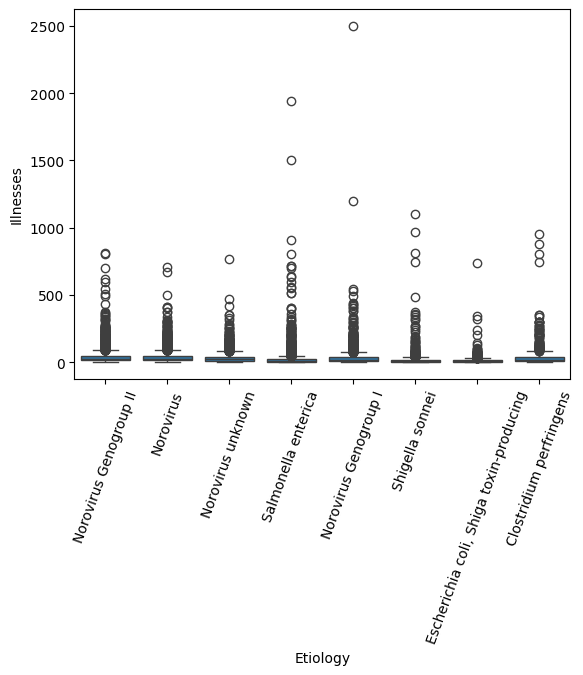

In [312]:
top_etiology = df.Etiology.value_counts().index[:8]
sns.boxplot(data = df[df['Etiology'].isin(top_etiology)], x='Etiology', y='Illnesses')
plt.xticks(rotation=70)


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Norovirus Genogroup II'),
  Text(1, 0, 'Norovirus'),
  Text(2, 0, 'Norovirus unknown'),
  Text(3, 0, 'Salmonella enterica'),
  Text(4, 0, 'Norovirus Genogroup I'),
  Text(5, 0, 'Shigella sonnei'),
  Text(6, 0, 'Escherichia coli, Shiga toxin-producing'),
  Text(7, 0, 'Clostridium perfringens')])

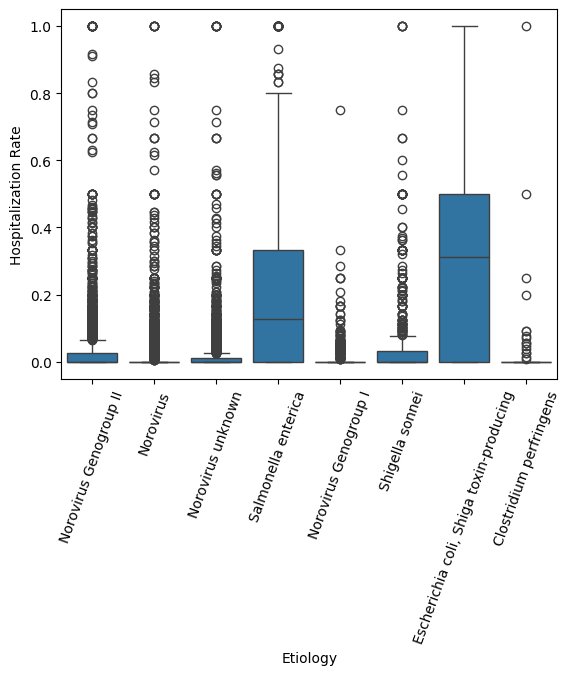

In [313]:

sns.boxplot(data = df[df['Etiology'].isin(top_etiology)], x='Etiology', y='Hospitalization Rate')
plt.xticks(rotation=70)

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Norovirus Genogroup II'),
  Text(1, 0, 'Norovirus'),
  Text(2, 0, 'Norovirus unknown'),
  Text(3, 0, 'Salmonella enterica'),
  Text(4, 0, 'Norovirus Genogroup I'),
  Text(5, 0, 'Shigella sonnei'),
  Text(6, 0, 'Escherichia coli, Shiga toxin-producing'),
  Text(7, 0, 'Clostridium perfringens')])

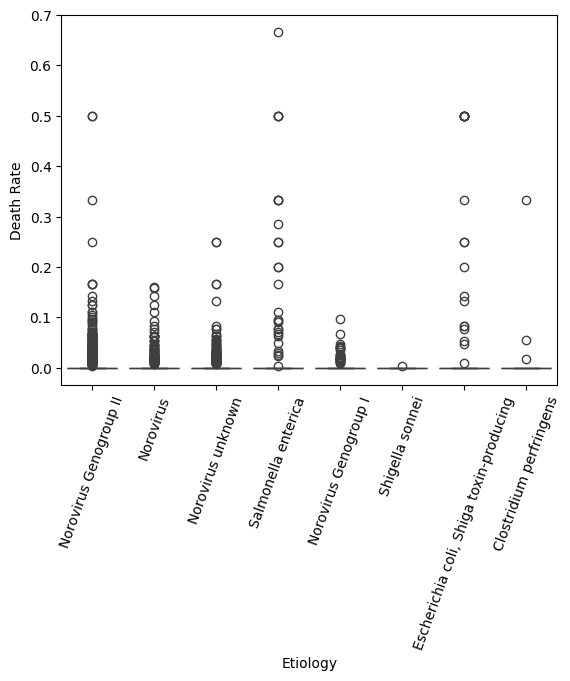

In [314]:
sns.boxplot(data = df[df['Etiology'].isin(top_etiology)], x='Etiology', y='Death Rate')
plt.xticks(rotation=70)

### Illnesses by month

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12')])

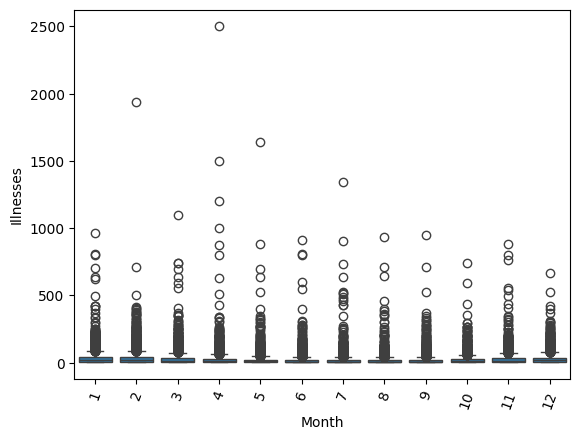

In [315]:
sns.boxplot(data = df, x='Month', y='Illnesses')
plt.xticks(rotation=70)

In [316]:
## Plots are hard to see because of outliers for # of illnesses and also most hospitalization rates / death rates are low.  Would break this out by etiology as well, 
#but in the interest of time am moving on
for month in range(1, 13):
    sub_df = df[df['Month'] == month]
    print(f'Month: {month}')
    print(sub_df.Illnesses.describe())
    print('\n'*3)

Month: 1
count    6224.000000
mean       30.918220
std        41.425483
min         2.000000
25%         9.000000
50%        20.000000
75%        40.000000
max       964.000000
Name: Illnesses, dtype: float64




Month: 2
count    5838.000000
mean       31.048818
std        46.661942
min         2.000000
25%         8.000000
50%        19.000000
75%        39.000000
max      1939.000000
Name: Illnesses, dtype: float64




Month: 3
count    5473.000000
mean       26.970766
std        41.537342
min         2.000000
25%         6.000000
50%        16.000000
75%        34.000000
max      1101.000000
Name: Illnesses, dtype: float64




Month: 4
count    4056.000000
mean       24.946992
std        63.711185
min         2.000000
25%         5.000000
50%        13.000000
75%        28.000000
max      2500.000000
Name: Illnesses, dtype: float64




Month: 5
count    3336.000000
mean       20.770384
std        47.892121
min         2.000000
25%         4.000000
50%        10.000000
75%        22

In [317]:
for year in range(2009, 2018):
    sub_df = df[df['Year'] == year]
    sub_df = sub_df[sub_df['Etiology'].isin(top_etiology)]
    print(f'Year: {year}')
    for i, etiology in enumerate(list(sub_df.Etiology.value_counts().index)):
        print(etiology, list(sub_df.Etiology.value_counts())[i], f'{list(sub_df.Etiology.value_counts())[i]/sub_df.shape[0]*100:.2f}%')
    print('\n'*3)

Year: 2009
Norovirus 484 34.50%
Norovirus Genogroup II 407 29.01%
Salmonella enterica 164 11.69%
Norovirus unknown 160 11.40%
Shigella sonnei 79 5.63%
Escherichia coli, Shiga toxin-producing 49 3.49%
Norovirus Genogroup I 33 2.35%
Clostridium perfringens 27 1.92%




Year: 2010
Norovirus Genogroup II 659 34.39%
Norovirus 638 33.30%
Norovirus unknown 209 10.91%
Salmonella enterica 177 9.24%
Norovirus Genogroup I 120 6.26%
Escherichia coli, Shiga toxin-producing 48 2.51%
Shigella sonnei 34 1.77%
Clostridium perfringens 31 1.62%




Year: 2011
Norovirus Genogroup II 630 34.71%
Norovirus 585 32.23%
Norovirus unknown 210 11.57%
Salmonella enterica 172 9.48%
Norovirus Genogroup I 87 4.79%
Escherichia coli, Shiga toxin-producing 63 3.47%
Shigella sonnei 48 2.64%
Clostridium perfringens 20 1.10%




Year: 2012
Norovirus Genogroup II 820 36.71%
Norovirus 633 28.33%
Norovirus unknown 290 12.98%
Salmonella enterica 169 7.56%
Norovirus Genogroup I 150 6.71%
Shigella sonnei 76 3.40%
Escherichia col

In [318]:
for month in range(1, 13):
    print(month)
    sub_df = df[df['Month'] == month]
    sub_df = sub_df[sub_df['Etiology'].isin(top_etiology)]
    for i, etiology in enumerate(list(sub_df.Etiology.value_counts().index)):
        print(etiology, list(sub_df.Etiology.value_counts())[i], f'{list(sub_df.Etiology.value_counts())[i]/sub_df.shape[0]*100:.2f}%')
    print('\n'*3)

1
Norovirus 1346 33.33%
Norovirus Genogroup II 1317 32.61%
Norovirus unknown 700 17.33%
Norovirus Genogroup I 371 9.19%
Salmonella enterica 158 3.91%
Shigella sonnei 81 2.01%
Clostridium perfringens 41 1.02%
Escherichia coli, Shiga toxin-producing 25 0.62%




2
Norovirus 1397 37.39%
Norovirus Genogroup II 1155 30.92%
Norovirus unknown 562 15.04%
Norovirus Genogroup I 336 8.99%
Salmonella enterica 157 4.20%
Shigella sonnei 67 1.79%
Clostridium perfringens 45 1.20%
Escherichia coli, Shiga toxin-producing 17 0.46%




3
Norovirus 1085 32.16%
Norovirus Genogroup II 1058 31.36%
Norovirus unknown 479 14.20%
Norovirus Genogroup I 347 10.28%
Salmonella enterica 223 6.61%
Shigella sonnei 74 2.19%
Clostridium perfringens 63 1.87%
Escherichia coli, Shiga toxin-producing 45 1.33%




4
Norovirus Genogroup II 644 27.32%
Norovirus 584 24.78%
Norovirus Genogroup I 343 14.55%
Norovirus unknown 310 13.15%
Salmonella enterica 268 11.37%
Clostridium perfringens 84 3.56%
Shigella sonnei 73 3.10%
Escheric

## Notes from above: 
- median illnesses peaks in january (20), has minimum in August (7). Generally winter month medians are higher than summer months
- the top illnesses change depending on the season -- the top diseases in january are related to the norovirus, but the dramatic decrease in norovirus related illnesses in summer make salmonella rise to the top of the list
- we have a lot less data from 2012/2013 than other years but the distribution of the etiologies seems similar to the other years so I will keep it in my data set

In [319]:
#new variable for quarter
df['Quarter'] = df["DATE"].dt.quarter

KeyError: 'DATE'

In [ ]:
## Save new df
df.to_csv('df_expanded.csv')

## Before going onto modeling, here are some other things to explore if I had more time:
- Only 71.83% of observations have an etiology listed -- why?
- Some states / etiologies are more/less likely to have complete info on hospitalizatiosn / deaths. Why?
- Primary mode has 20K+ entries for "Food" but only 10K are true for 'Food_bool' (based on the existence of an entry in Food vehicle, Food contaminated ingredient, and IFSAC Category), meaning more specific information on the source of the food-born illness is missing in half of food related illnesses.  Why?
- Should I use data from 2012/2013 considering there is significantly less than other years?

# Part 2 Task B: Modeling

## Question: Based on the information provided for cases where only one etiology was determined, can we predict whether an outbreak's etiologiy will be classified as Norovirus Genogroup II (counting both confirmed and suspected)? I chose this target because it is a large percent of cases, but never the majority.  I thought about grouping all Noroviruses together but that would be the overwhelming number of cases (ex: accounting for around 90% of all outbreaks in 2017). By focusing on one etiology, especially one whose outbreaks may or may not closely have similar characteristics to other norovirus diseases, there might be a greater challenge in honing in on the specific type of norovirus.

## Target: Etiology_Norovirus Genogroup II == True

## Caveats: there are a lot of null values or incomplete info (ie: info on hospitalizations / deaths) but because that will reflect the quality of the data one would actually use to predict the etiology assuming that ongoing data collection is done in in the same fashion as done for this data, then this is a valid approach.  This also assumes that the disease is not determined until after it has run its course (ie hospitalizations occur prior to determining etiology, deaths occur before determining etiology).  If the etiology is used to inform whether someone should be hospitalized or treated, that will mean that hospitalizations and deaths are affected by the etiology, and therefore not appropriate for using as a feature when determining the etiology.

## To avoid some issues with time series leakage, I will use only data from < 2016 in my train set and > 2016 as my test set.  Additionally, I will not use the date as a feature in training. I will keep month/quarter as the prevalence of a certain etiology is related to the month/quarter of the year.  This will, to an extent, avoid using an observation previous month's etiology to inform an observation in next month's etiology in the training set as the model will not be able to differentiate between February 2015 and February 2013 (for example).

In [ ]:
model_df = df[df['Num_Etiology'] == 1]
#not imputing data, dropping NA bc the number of nulls for these columns is minimal and at this point I am not sure the best method for imputing missing data
model_df = model_df.dropna(subset = ['Illnesses', 'Hospitalizations', 'Deaths'])
model_df = pd.get_dummies(model_df, columns = ['State', 'Primary Mode'])

In [ ]:
model_df.columns

In [ ]:
remove_status_columns = [x for x in df.columns if 'Status' in x]
#Remove etiology columns except for our target one
remove_etiology_columns = [x for x in df.columns if ('Etiology' in x and 'Norovirus Genogroup II' not in x)]
remove_sero_geno_columns = [x for x in df.columns if 'Serotype or Genotype' in x]
remove_one_hot_encoded_columns = ['Food Vehicle',
       'Food Contaminated Ingredient', 'IFSAC Category', 'Water Exposure',
       'Water Type', 'Animal Type', 'Animal Type Specify', 'Setting']
remove_columns = remove_status_columns + remove_etiology_columns + remove_sero_geno_columns + ['DATE', 'Info on Hospitalizations', 'Info on Deaths', 'Num_Etiology', 'Num_Serotype_Genotype'] + remove_one_hot_encoded_columns 

In [ ]:
model_df = model_df.drop(remove_columns, axis=1)


In [ ]:
model_df.head()

In [320]:
model_df.to_csv("model_df.csv")

In [321]:
## Normally would do a random train, test split but am using < 2016 as trainin and >=2016 as test
train_X = model_df[model_df.Year < 2016].drop(['Year', 'Etiology_Norovirus Genogroup II'], axis = 1)
train_y = model_df[model_df.Year < 2016]['Etiology_Norovirus Genogroup II']
test_X = model_df[model_df.Year >= 2016].drop(['Year', 'Etiology_Norovirus Genogroup II'], axis = 1)
test_y = model_df[model_df.Year >= 2016]['Etiology_Norovirus Genogroup II']


In [322]:
test_X.shape

(7136, 147)

In [323]:
from sklearn.impute import SimpleImputer
import numpy as np

In [324]:
train_X['Death Rate'].fillna(train_X['Death Rate'].mean(), inplace=True)
train_X['Hospitalization Rate'].fillna(train_X['Death Rate'].mean(), inplace=True)
test_X['Death Rate'].fillna(train_X['Death Rate'].mean(), inplace=True)
test_X['Hospitalization Rate'].fillna(train_X['Death Rate'].mean(), inplace=True)


In [325]:
from xgboost import XGBClassifier

model = XGBClassifier()

In [326]:
model.fit(train_X, train_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [327]:
## if I had more time, I would do a grid search to optimize hyper parameters!

### Feature Importances

In [328]:

results=pd.DataFrame()
results['columns']=train_X.columns
results['importances'] = model.feature_importances_
results.sort_values(by='importances',ascending=False,inplace=True)

results[:50]

,columns,importances
135,State_Virginia,0.082221
125,State_Pennsylvania,0.068995
107,State_Massachusetts,0.063319
124,State_Oregon,0.045093
120,State_North Carolina,0.041131
109,State_Minnesota,0.036391
129,State_South Carolina,0.031880
139,State_Wisconsin,0.029583
4,Setting_Long-term care/nursing home/assisted l...,0.024868
91,State_Colorado,0.021480


## Metrics, choosing a threshold, and presenting results

In [329]:
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, roc_curve

In [330]:
train_pred = model.predict(train_X)
train_pred_probs = model.predict_proba(train_X)[:, 1]
print(f'Train accuracy (.5 thresh): {accuracy_score(train_y, train_pred)}')
print(f'Train recall: {recall_score(train_y, train_pred)}')
print(f'Train ROC AUC: {roc_auc_score(train_y, train_pred)}')
test_pred = model.predict(test_X)
test_pred_probs = model.predict_proba(test_X)[:, 1]
print(f'Train accuracy (.5 thresh): {accuracy_score(test_y, test_pred)}')
print(f'Train recall: {recall_score(test_y, test_pred)}')
print(f'Train ROC AUC: {roc_auc_score(test_y, test_pred)}')

Train accuracy (.5 thresh): 0.8785506962789029
Train recall: 0.4460131238814874
Train ROC AUC: 0.7047105488331523
Train accuracy (.5 thresh): 0.8157230941704036
Train recall: 0.3026706231454006
Train ROC AUC: 0.6189407020357273


[[0.93521078 0.06478922]
 [0.69732938 0.30267062]]


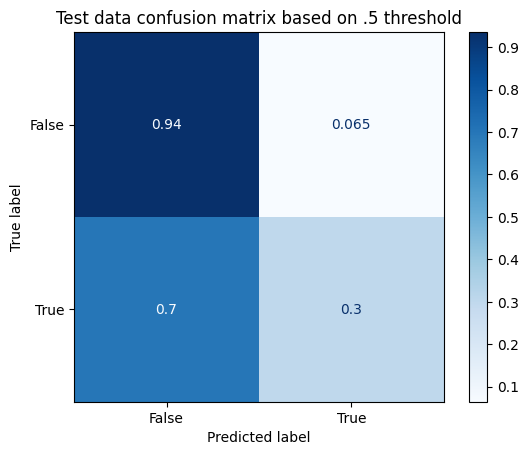

In [331]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay.from_estimator(
        model,
        test_X,
        test_y,
        cmap=plt.cm.Blues,
        normalize = 'true'
        
    )
disp.ax_.set_title('Test data confusion matrix based on .5 threshold')

print(disp.confusion_matrix)

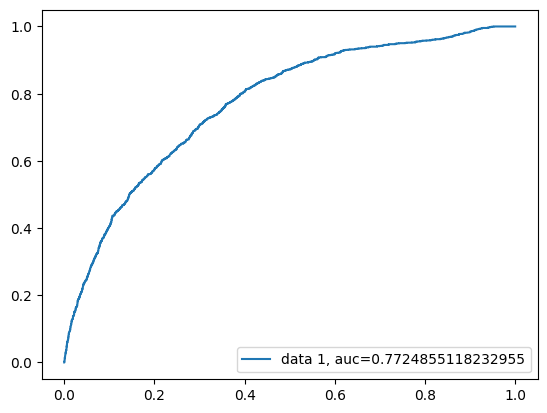

In [332]:
fpr, tpr, _ = roc_curve(test_y, test_pred_probs)
auc = roc_auc_score(test_y, test_pred_probs)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()


The best threshold based on roc is [0.2]


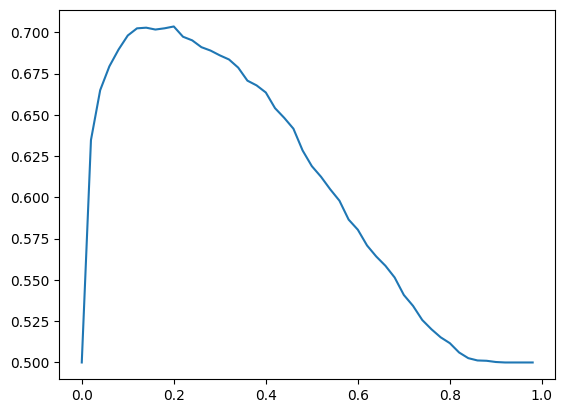

In [333]:
y_test_array = test_y.to_numpy()
thresh = np.arange(0,1, .02)
thresh_roc =[]

for t in thresh:
    y_pred_temp = model.predict_proba(test_X)[:, 1] > t
    thresh_roc.append(roc_auc_score(test_y, y_pred_temp))

fig, ax = plt.subplots()
ax.plot(thresh, thresh_roc)
best_thresh = thresh[np.argsort(thresh_roc)[-1:]]
print(f'The best threshold based on roc is {best_thresh}')

### Final Results for prediting that the Etiology is Norovirus Genogroup II, based on a threshold optimized for accuracy (would want to know more about the use case to determine if there is a better metric to use, as recall may be more important given that we usually want to avoid false negatives when detecting disease!

In [334]:

test_pred_new_thresh = model.predict_proba(test_X)[:, 1] > best_thresh
print(f'Train accuracy (.5 thresh): {accuracy_score(test_y, test_pred_new_thresh)}')
print(f'Train recall: {recall_score(test_y, test_pred_new_thresh)}')
print(f'Train ROC AUC: {roc_auc_score(test_y, test_pred_new_thresh)}')

Train accuracy (.5 thresh): 0.7009529147982063
Train recall: 0.7077151335311572
Train ROC AUC: 0.7035465785140236


[[1.         0.        ]
 [0.70935412 0.29064588]]


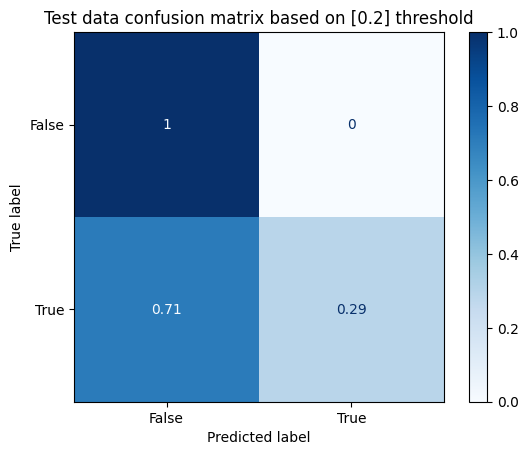

In [335]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay.from_estimator(
        model,
        test_X,
        test_pred_new_thresh,
        cmap=plt.cm.Blues,
        normalize = 'true'
        
    )
disp.ax_.set_title(f'Test data confusion matrix based on {best_thresh} threshold')

print(disp.confusion_matrix)

# Group 2 - Task F

## What improvements would I make to the model, in additon to caveats listed earlier? (would elaborate more but am running out of time!)

- Hone in on appropriate target: should some of these etiologies be grouped together?
- Do a grid search for best hyper parameters
- Evaluation metric: what metric is most important? I chose ROC AUC here because it's commonly used because it takes into account the tradeoff between FPR and TPR
- Use a model that can take advantage of time related data (one would imagine that the diseases found in one month can provide insight into the diseases found in the next month)
- Find out if there is a real world cost to FP, TP, FN, TN and apply them to the confusion matrix in order to optimize for cost